# **Optical Character Recognition (OCR) Model: Using TensorFlow and Keras API**


---


Workshop by LU HOU YANG

**[TensorFlow Documentation](https://www.tensorflow.org/api_docs/python/tf)**

## **Install TensorFlow & Configure Environment Locally**


---



**Youtube Tutorial & Steps**
1. [Youtube](https://youtu.be/PnK1jO2kXOQ?list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN)
1. [Steps From Youtube Video](https://github.com/jeffheaton/t81_558_deep_learning/blob/master/install/tensorflow-install-jul-2020.ipynb)

---


1. Install [Anaconda](https://docs.anaconda.com/free/anaconda/install/)
1. Check [System Requirement](https://www.tensorflow.org/install/pip#system_requirements) for TensorFlow
1. Check [Software Requirement](https://www.tensorflow.org/install/pip#software_requirements)  for TensorFlow
1. Build Configuration CPU

  * [TF CPU Configuration](https://www.tensorflow.org/install/source_windows#cpu)
  * Create [Conda Environment]()
  * Install [dependancies](https://www.tensorflow.org/install/pip)
  ```
  # Anything above 2.10 is not supported on the GPU on Windows Native
  python -m pip install "tensorflow<2.11"
  # Verify the installation:
  python -c "import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))"
  ```
  
1. Build Configuration GPU

  * Check if you GPU supports CUDA [here](https://developer.nvidia.com/cuda-gpus)
  * [TF GPU Configuration](https://www.tensorflow.org/install/source_windows#gpu)
  * [Nvidia CUDA toolkit](https://developer.nvidia.com/cuda-toolkit-archive)
  * [cuDNN Archive](https://developer.nvidia.com/rdp/cudnn-archive)
  * Create [Conda Environment]()
  * Install [dependancies](https://www.tensorflow.org/install/pip). Change CUDA toolkit, cuDNN version
  ```
  conda install -c conda-forge cudatoolkit=11.2 cudnn=8.1.0
  # Anything above 2.10 is not supported on the GPU on Windows Native
  python -m pip install "tensorflow<2.11"
  # Verify the installation:
  python -c "import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))"
  ```

## **1. Data Collection & Preparation**


---



### Data Sources

**[Kaggle](https://www.kaggle.com)**

**[Hugging Face](https://huggingface.co)**

**[NIST](https://www.nist.gov/srd/srd-catalog)**

### EMNIST Dataset

**Extended Modified NIST [(EMNIST)](https://www.nist.gov/itl/products-and-services/emnist-dataset) Dataset**

Derived from [NIST Special Database 19](https://www.nist.gov/srd/nist-special-database-19)

* EMNIST ByClass: 814,255 characters. 62 unbalanced classes.
* EMNIST ByMerge: 814,255 characters. 47 unbalanced classes.
* EMNIST Balanced:  131,600 characters. 47 balanced classes.
* EMNIST Letters: 145,600 characters. 26 balanced classes.
* EMNIST Digits: 280,000 characters. 10 balanced classes.
* EMNIST MNIST: 70,000 characters. 10 balanced classes.

### Download & Inspect Data

1. Manual Download - [Kaggle, Balanced EMNIST](https://www.kaggle.com/datasets/crawford/emnist/data)
  * [Train CSV](https://www.kaggle.com/datasets/crawford/emnist/data?select=emnist-balanced-train.csv)
  * [Test CSV](https://www.kaggle.com/datasets/crawford/emnist/data?select=emnist-balanced-test.csv)
  * [Mapping](https://www.kaggle.com/datasets/crawford/emnist/data?select=emnist-balanced-mapping.txt)

  Then, unzip the files in the root of project

1. From Terminal
  * Follow steps from here https://github.com/otenim/Python-EMNIST-Decoder
1. From IDE - [NIST SD 19, ByMerge](https://www.nist.gov/srd/nist-special-database-19)
```python
  import os
  import pathlib

  DOWNLOAD_DATA_DIR = 'C:\\Users\\User\\Desktop\\Python\\OCR_Workshop\\data'

  download data, by_merge, unzip
       
  download_data_dir = pathlib.Path(DOWNLOAD_DATA_DIR)
  if not data_dir.exists():
     tf.keras.utils.get_file(
          'by_merge.zip',
          origin='https://s3.amazonaws.com/nist-srd/SD19/by_merge.zip',
          extract=True,
          cache_dir='.',
          cache_subdir='data'
      )
```
1. Online Google Colab/Jupyter Notebook

  Download train/test CSV files, ASCII mapping
  ```
  !gdown 1ruHQJG2pPaeoSpvexdGgKQrwmZPE-Req
  !gdown 1bHJFAdbKr_55HSVsjauuZpI9HGOO9UsZ
  !gdown 1hf0mtpXwECXi_IvgwCQrgSzmPe-DHlaT
  ```

  Unzip the files
  ```
  !unzip -q /content/emnist-balanced-train.csv.zip
  !unzip -q /content/emnist-balanced-test.csv.zip
  ```

  See mapping
  ```
  !cat /content/emnist-balanced-mapping.txt
  ```

In [1]:
# download
!gdown 1ruHQJG2pPaeoSpvexdGgKQrwmZPE-Req
!gdown 1bHJFAdbKr_55HSVsjauuZpI9HGOO9UsZ
!gdown 1hf0mtpXwECXi_IvgwCQrgSzmPe-DHlaT

Downloading...
From (original): https://drive.google.com/uc?id=1ruHQJG2pPaeoSpvexdGgKQrwmZPE-Req
From (redirected): https://drive.google.com/uc?id=1ruHQJG2pPaeoSpvexdGgKQrwmZPE-Req&confirm=t&uuid=a33ad1ee-cb33-4c0b-8878-e56f45108864
To: /content/emnist-balanced-train.csv.zip
100% 39.0M/39.0M [00:01<00:00, 19.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1bHJFAdbKr_55HSVsjauuZpI9HGOO9UsZ
To: /content/emnist-balanced-test.csv.zip
100% 6.53M/6.53M [00:00<00:00, 11.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1hf0mtpXwECXi_IvgwCQrgSzmPe-DHlaT
To: /content/emnist-balanced-mapping.txt
100% 326/326 [00:00<00:00, 1.31MB/s]


In [2]:
# unzip
!unzip -q /content/emnist-balanced-train.csv.zip
!unzip -q /content/emnist-balanced-test.csv.zip

In [3]:
# see mapping
!cat /content/emnist-balanced-mapping.txt

0 48
1 49
2 50
3 51
4 52
5 53
6 54
7 55
8 56
9 57
10 65
11 66
12 67
13 68
14 69
15 70
16 71
17 72
18 73
19 74
20 75
21 76
22 77
23 78
24 79
25 80
26 81
27 82
28 83
29 84
30 85
31 86
32 87
33 88
34 89
35 90
36 97
37 98
38 100
39 101
40 102
41 103
42 104
43 110
44 113
45 114
46 116

**ASCII chart**

![ASCII chart](https://drive.google.com/uc?export=view&id=1fj8tHHXxCDbf87Y6vYhiROQPRzLL3wfV)

### Prepare Data for TensorFlow

**Determine Load Function**

**pd.read_csv**

Read a comma-separated values (csv) file into DataFrame. [pd.read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)
```
pandas.read_csv(
  filepath_or_buffer
  )
```

**tf.keras.utils.image_dataset_from_directory**

Require directory structure for [tf.keras.utils.image_dataset_from_directory](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory):
```
main_directory/
...class_a/
......a_image_1.jpg
......a_image_2.jpg
...class_b/
......b_image_1.jpg
......b_image_2.jpg
```

## **2. Visualize Data & Preprocessing**


---



### Load Data & Inspect Shape

In [4]:
import gc

import tensorflow as tf
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from keras import layers
from keras.models import Sequential
from IPython.display import display, clear_output

gc.collect()
# add any additional imports after this line -----------------------------------

4

In [5]:
# declare global variables
SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)

In [49]:
train_dataframe = pd.read_csv('emnist-balanced-train.csv')
test_dataframe = pd.read_csv('emnist-balanced-test.csv')
mapping = pd.read_csv('emnist-balanced-mapping.txt', sep=' ', header=None)

In [50]:
display(train_dataframe.head())
train_dataframe.info()
print(f"train_dataframe shape: {train_dataframe.shape}")

,45,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532,0.533
0,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,42,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112799 entries, 0 to 112798
Columns: 785 entries, 45 to 0.533
dtypes: int64(785)
memory usage: 675.6 MB
train_dataframe shape: (112799, 785)


**[Kaggle EMNIST](https://www.kaggle.com/datasets/crawford/emnist/data)**

**Format**

There are six different splits provided in this dataset and each are provided in two formats:

* Binary (see emnist_source_files.zip)
* CSV (combined labels and images)
  * Each row is a separate image
  * 785 columns
  * First column = class_label (see mappings.txt for class label definitions)
  * Each column after represents one pixel value (784 total for a 28 x 28 image)

22296

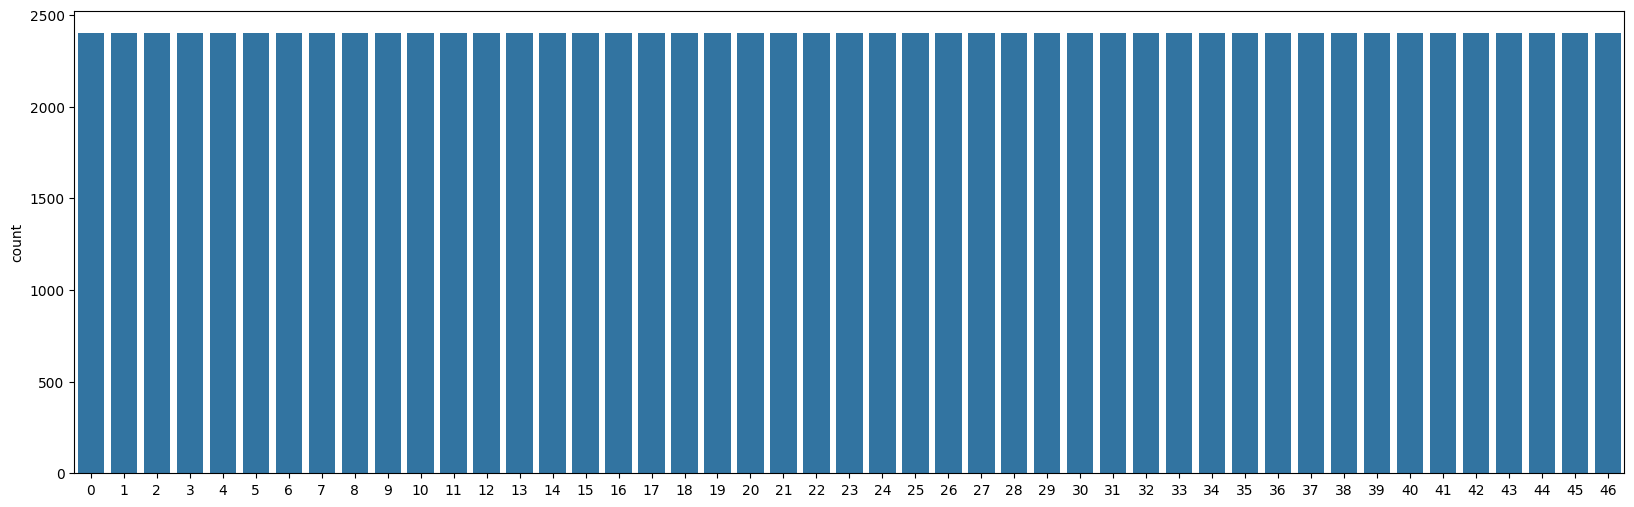

In [51]:
labels = train_dataframe["45"].values

plt.figure(figsize=(20, 6))
sns.countplot(x=labels)

del labels
gc.collect()

In [52]:
def get_mapping(m):
  class_mapping = {}
  ascii_code = m[1].values
  for i, code in enumerate(ascii_code):
    class_mapping[i] = chr(code)

  return class_mapping

In [53]:
class_mapping = get_mapping(mapping)
print(f"Class Map: {class_mapping}")

Class Map: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'd', 39: 'e', 40: 'f', 41: 'g', 42: 'h', 43: 'n', 44: 'q', 45: 'r', 46: 't'}


### Preprocessing

**Refering to [EMNSIT research paper](https://arxiv.org/abs/1702.05373v1)**

* CSV (combined labels and images)
  * Each row is a separate image
  * 785 columns
  * First column = class_label (see mappings.txt for class label definitions)
  * Each column after represents one pixel value (784 total for a 28 x 28 image)

In [54]:
# extract label and training data
y_train = np.array(train_dataframe.iloc[:,0].values)
x_train = np.array(train_dataframe.iloc[:,1:].values)

y_test = np.array(test_dataframe.iloc[:,0].values)
x_test = np.array(test_dataframe.iloc[:,1:].values)

print(f"Extracted Labels: {y_train}\n")
print(f"Train data shape: {x_train.shape}")
print(f"Train data shape: {x_test.shape}\n")

del train_dataframe
del test_dataframe
gc.collect()

Extracted Labels: [36 43 15 ... 23 31  8]

Train data shape: (112799, 784)
Train data shape: (18799, 784)



9898

In [55]:
# normalize
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Reshape the data to have a single color channel (since EMNIST is grayscale)
# and match the input shape expected by the model
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))
print(f"Shape before transpose: {x_train.shape}")
print(f"Mean before transpose: {np.mean(x_train[116])}\n")

Shape before transpose: (112799, 28, 28, 1)
Mean before transpose: 0.11454582214355469



### Show 5 samples from original data

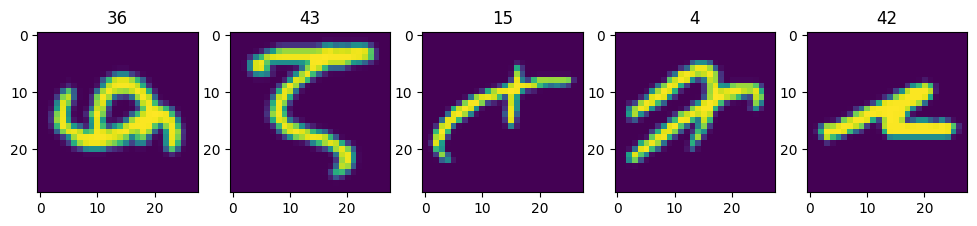

In [56]:
fig, axes = plt.subplots(1, 5, figsize=(12, 12))

for i, ax in enumerate(axes.flatten()):
  ax.imshow(x_train[i])
  ax.set_title(y_train[i])

In [57]:
# transpose to reverse effect from converting png to csv (2D -> 1D)
def transpose_data(x):
    return np.transpose(np.squeeze(x))[..., np.newaxis]

x_train = np.array([transpose_data(x) for x in x_train])
x_test = np.array([transpose_data(x) for x in x_test])
print(f"Shape after transpose: {x_train.shape}")
print(f"Mean after transpose: {np.mean(x_train[116])}\n")

Shape after transpose: (112799, 28, 28, 1)
Mean after transpose: 0.11454582214355469



In [60]:
# get a sample image for future comparison
sample_image = x_train[116]
sample_label = y_train[116]
print(f"Sample image shape: {sample_image.shape}")
print(f"Sample label: {class_mapping.get(sample_label)}")

Sample image shape: (28, 28, 1)
Sample label: F


In [58]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
print(f"train_dataset shape: {train_dataset.element_spec}")

train_dataset shape: (TensorSpec(shape=(28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))


In [63]:
del x_train
del x_test
del y_train
del y_test
gc.collect()

25271

In [62]:
train_dataset = train_dataset.cache().shuffle(10000).batch(16).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.cache().batch(16)

### Show 5 samples from preprocessed data

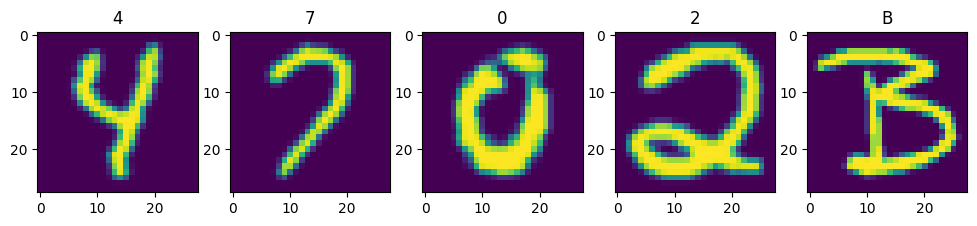

In [64]:
for img_ds, labels_ds in train_dataset.take(1):
  fig, axes = plt.subplots(1, 5, figsize=(12, 12))

  for i, ax in enumerate(axes.flatten()):
    ax.imshow(img_ds[i])
    ax.set_title(class_mapping.get(labels_ds[i].numpy()))

## **3. Build Model**


---



### Neural Network (NN)

### Convolutional Neural Network (CNN)

### Build Sequential Model

In [19]:
input_shape = img_ds.shape[1:]
num_classes = len(class_mapping)

model = Sequential([
    layers.Input(shape=input_shape),
    layers.Conv2D(filters=32, kernel_size=(6, 6), activation='relu', padding='same'),
    layers.MaxPooling2D((3, 3)),
    layers.Conv2D(filters=64, kernel_size=(4, 4), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes)
])

## **4. Compile, Fit & Save Model**


---



**Compile: specifying a loss, metrics, and an optimizer**

### Optimizers

**Adam**

Adaptive Moment Estimation is an algorithm for optimization technique for gradient descent. [Read more here](https://www.geeksforgeeks.org/adam-optimizer/)


**RMSprop**

RMSprop (Root Mean Squared Propagation) is an adaptive learning rate optimization algorithm. [Read more here](https://medium.com/thedeephub/what-is-rmsprop-0f54effc47e4)

### Loss Functions

**Categorical Cross-Entropy**

Computes the crossentropy loss between the labels **(one-hot encoded vectors)** and predictions. [Read more here](https://neuralthreads.medium.com/categorical-cross-entropy-loss-the-most-important-loss-function-d3792151d05b)

**Sparse Categorical Cross-Entropy**

Computes the crossentropy loss between the labels **(integer values)** and predictions. [Read more here](https://medium.com/@shireenchand/choosing-between-cross-entropy-and-sparse-cross-entropy-the-only-guide-you-need-abea92c84662)

### Metrics

**Accuracy**

**Loss**

**Val Accuracy**

**Val Loss**

### Compile

In [20]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        1184      
                                                                 
 max_pooling2d (MaxPooling2  (None, 9, 9, 32)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          32832     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 512)               0

### Fit Model

In [22]:
EPOCHS = 5

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    restore_best_weights=True,
    min_delta=0,
    mode='max',
    verbose=0
)

In [23]:
history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=EPOCHS,
    callbacks=[early_stopping]
)

Epoch 1/5
7050/7050 [==============================] - 42s 5ms/step - loss: 0.9275 - accuracy: 0.7156 - val_loss: 0.4725 - val_accuracy: 0.8402
Epoch 2/5
7050/7050 [==============================] - 34s 5ms/step - loss: 0.5264 - accuracy: 0.8308 - val_loss: 0.4435 - val_accuracy: 0.8516
Epoch 3/5
7050/7050 [==============================] - 36s 5ms/step - loss: 0.4604 - accuracy: 0.8495 - val_loss: 0.4475 - val_accuracy: 0.8569
Epoch 4/5
7050/7050 [==============================] - 33s 5ms/step - loss: 0.4265 - accuracy: 0.8593 - val_loss: 0.4141 - val_accuracy: 0.8632
Epoch 5/5
7050/7050 [==============================] - 34s 5ms/step - loss: 0.4003 - accuracy: 0.8667 - val_loss: 0.4314 - val_accuracy: 0.8661


### Save Model

In [24]:
model.save('ocr_model')

## **5. Test Accuracy of Model**


---



### Evaluate

**Evaluate Function**

In [25]:
model.evaluate(test_dataset)

1175/1175 [==============================] - 3s 2ms/step - loss: 0.4314 - accuracy: 0.8661


[0.43141597509384155, 0.8661099076271057]

## **6. Export Model**


---



### Python Module

In [26]:
class OCDModel(tf.Module):
  def __init__(self, model):
    self.model = model
    self.class_mapping = {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9',
                        10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I',
                        19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R',
                        28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a',
                        37: 'b', 38: 'd', 39: 'e', 40: 'f', 41: 'g', 42: 'h', 43: 'n', 44: 'q', 45: 'r',
                        46: 't'}

  @tf.function
  def predict(self, data):
    if isinstance(data, tf.float32):
      result = self.model(data, training=False)
    elif isinstance(data, str):
      img = preprocess_image(data, 'preprocessed_input_img.png')
      result = self.model(img, training=False)
    else:
      raise ValueError("Unsurported data type.\nPlease pass preprocessed image using preprocess_image function.\nOr pass path to image file")

    return result

  def __call__(self, data):
    pred = self.predict(data)
    return self.class_mapping.get(np.argmax(pred.numpy()[0]))


### TensorFlow Lite for Flutter

**TensorFlow Lite**

* TensorFlow Lite is a way to run TensorFlow models on devices locally, supporting mobile, embedded, web, and edge devices.  [Read more here](https://blog.tensorflow.org/2023/08/the-tensorflow-lite-plugin-for-flutter-officially-available.html)

* Convert model to TFLite [Documentation](https://www.tensorflow.org/lite/models/convert/convert_models)

## **7. UI, Input & Preprocessing Pipeline**


---



### Preprocessing pipeline

In [27]:
!gdown 1-cTOocQVoNPAl4u5oxu6eBgIUG5jg4y3
!gdown 12NGQvSBp0hBIbiFidPYAyjKhX17ooJGn

Downloading...
From: https://drive.google.com/uc?id=1-cTOocQVoNPAl4u5oxu6eBgIUG5jg4y3
To: /content/random_scale_img_f.png
100% 14.1k/14.1k [00:00<00:00, 36.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=12NGQvSBp0hBIbiFidPYAyjKhX17ooJGn
To: /content/sample_input.png
100% 793/793 [00:00<00:00, 4.22MB/s]


In [28]:
import cv2
from scipy.ndimage import gaussian_filter

In [29]:
def preprocess_image(input_image_path, output_image_path):
    # read the original image
    image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError("Image not found or the path is incorrect")

    # invert the colors of the image
    image = 255 - image

    # apply Gaussian filter with σ = 1
    image = gaussian_filter(image, sigma=1)

    # extract the region around the character
    # find non-zero pixels (characters)
    coords = cv2.findNonZero(image)
    x, y, w, h = cv2.boundingRect(coords)

    # crop the image to the bounding box
    cropped_image = image[y:y+h, x:x+w]

    # center the character in a square image
    # calculate the size of the new image (keeping the aspect ratio)
    max_side = max(w, h)
    square_image = np.zeros((max_side, max_side), dtype=np.uint8)

    # compute the offset to center the character
    x_offset = (max_side - w) // 2
    y_offset = (max_side - h) // 2

    # place the cropped image in the center of the square image
    square_image[y_offset:y_offset+h, x_offset:x_offset+w] = cropped_image

    # add a 2-pixel border
    padded_image = cv2.copyMakeBorder(square_image, 2, 2, 2, 2, cv2.BORDER_CONSTANT, value=0)

    # down-sample to 28x28 using bi-cubic interpolation
    downsampled_image = cv2.resize(padded_image, (28, 28), interpolation=cv2.INTER_CUBIC)

    # scale intensity values to [0, 255]
    # convert image to have values in range [0, 255]
    final_image = cv2.normalize(downsampled_image, None, 0, 255, cv2.NORM_MINMAX)

    # normalize values between [0, 1]
    final_image = final_image/255.0

    # verify that preprocessing is consistant with data
    print(f"Mean input image: {np.mean(final_image)}\n")
    plt.imshow(final_image[..., np.newaxis])

    # save the final processed image
    cv2.imwrite(output_image_path, final_image[..., np.newaxis])

    # add batch shape, and channel
    return final_image[np.newaxis, ..., np.newaxis]

Mean input image: 0.10560724289715887

Mean input image: 0.09445278111244497



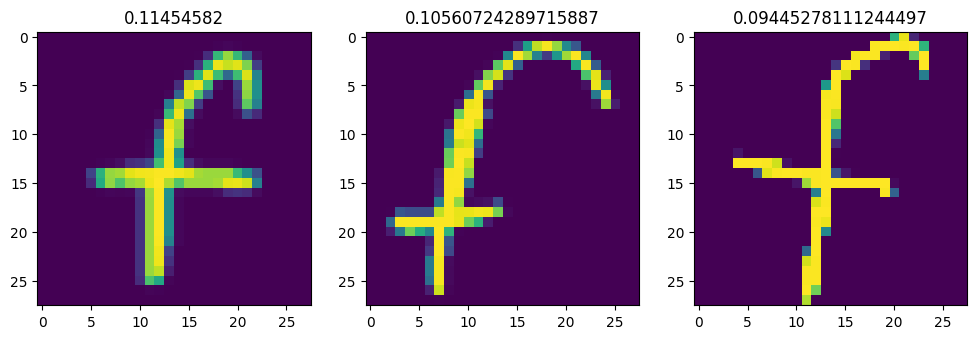

In [72]:
# compare sample from dataset & preprocessed input image
fig, axes = plt.subplots(1, 3, figsize=(12, 8))
axes[0].imshow(sample_image)
axes[0].set_title(np.mean(sample_image));

preprocessed_img_nist = preprocess_image('sample_input.png', 'preprocessed_sample_input.png')
img1 = np.squeeze(preprocessed_img_nist, axis=0)
axes[1].imshow(img1)
axes[1].set_title(np.mean(img1));

preprocessed_img_f = preprocess_image('random_scale_img_f.png', 'preprocessed_random_scale_img_f.png')
img2 = np.squeeze(preprocessed_img_f, axis=0)
axes[2].imshow(img2)
axes[2].set_title(np.mean(img2));

## **8. Load & Use Pretrained Model**


---



### Run prediction on Google Colab

1/1 [==============================] - 0s 118ms/step
Prediction: F


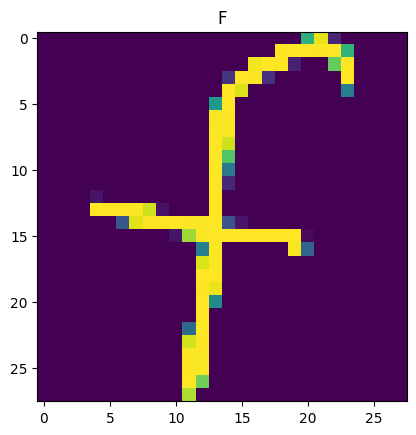

In [73]:
model = tf.keras.models.load_model('ocr_model')
pred = model.predict(preprocessed_img_f)
print(f"Prediction: {class_mapping.get(np.argmax(pred[0]))}")

plt.figure()
plt.imshow(np.squeeze(preprocessed_img_f, axis=0))
plt.title(class_mapping.get(np.argmax(pred[0])));

### Python code to capture handwriting

**GitHub Repo**

### Deploy in Flutter application with TensorFlow Lite Plugin